In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Baseline

In [10]:
from google.colab import drive
drive.mount('/content/drive')

### SET OUTPUTS FOLDER ###
outputs_folder = "/content/drive/MyDrive/DSSE/GroupProject/outputs-baseline-v1/"

Mounted at /content/drive


In [11]:
def get_mbpp_df(mbpp_file_name):
  df = pd.read_json(outputs_folder + mbpp_file_name)
  df.columns = ["t0", "t1", "t2"]
  return df

def get_human_eval_df(human_eval_file_name):
  df = pd.read_json(outputs_folder + human_eval_file_name)
  df.columns = ["t0", "t1", "t2", "t3", "t4"]
  return df

def get_human_eval_15b_df(human_eval_15b_file_name):
  df = pd.read_json(outputs_folder + human_eval_15b_file_name)
  df.columns = ["t0", "t1", "t2"]
  return df

## Set File Names

In [12]:
mbpp_df = get_mbpp_df("final_eval_results_mbpp.json")
mbpp_df.head()

,t0,t1,t2
0,Passed,Passed,Failed
1,Failed,Failed,ExecutionFailed
2,ExecutionFailed,Failed,ExecutionFailed
3,Failed,Passed,Failed
4,Passed,Passed,Passed


In [13]:
human_eval_df = get_human_eval_df("final_eval_results_human_eval.json")
human_eval_df.head()

,t0,t1,t2,t3,t4
0,ExecutionFailed,Failed,Passed,Passed,Failed
1,Failed,Failed,Failed,Failed,Failed
2,Passed,ExecutionFailed,Passed,ExecutionFailed,Passed
3,Passed,Passed,Passed,Failed,Passed
4,Passed,Passed,Passed,Passed,Passed


In [14]:
human_eval_15b_df = get_human_eval_15b_df("final_eval_results_human_eval_15b.json")
human_eval_15b_df.head()

,t0,t1,t2
0,None,None,None
1,None,None,None
2,None,None,None
3,Passed,Passed,Passed
4,Passed,Passed,Passed


## Metrics

In [66]:
### Metrics Function Definitions ###
dbg = False

def dbg_print(msg):
  if dbg:
    print(msg)

def degradation_rate(df, column1, column2):
  # Corrected Outputs = Passed @ t2 when Failed at t1
  dbg_print("\n--------- Degradation Rate ----------")
  incorrect_outputs_df = df[((df[column2] == 'Failed') | (df[column2] == 'ExecutionFailed')) & (df[column1] == 'Passed')]
  dbg_print(incorrect_outputs_df.head())
  incorrect_outputs = len(incorrect_outputs_df)
  dbg_print(f"\nInCorrect Outputs: {incorrect_outputs}")
  total_outputs = len(df)
  dbg_print(f"Total Outputs: {total_outputs}")
  return (incorrect_outputs / total_outputs) * 100

def error_reduction_rate(df, column1, column2):
  # Corrected Outputs = Passed @ t2 when Failed at t1
  dbg_print("\n--------- Error Reduction Rate ----------")
  incorrect_outputs_df = df[((df[column1] == 'Failed') | (df[column1] == 'ExecutionFailed')) & (df[column2] == 'Passed')]
  dbg_print(incorrect_outputs_df.head())
  incorrect_outputs = len(incorrect_outputs_df)
  dbg_print(f"\nInCorrect Outputs: {incorrect_outputs}")
  total_outputs = len(df)
  dbg_print(f"Total Outputs: {total_outputs}")
  return (incorrect_outputs / total_outputs) * 100

def functional_accuracy(df, column):
  dbg_print("\n--------- Functional Accuracy ----------")
  passed_df = df[df[column] == 'Passed']
  dbg_print(passed_df.head())
  passed_outputs = len(passed_df)
  dbg_print(f"\nPassed at {column}: {passed_outputs}")
  total_outputs = len(df)
  dbg_print(f"Total Outputs: {total_outputs}")
  return passed_outputs / total_outputs * 100

def self_correction_rate(df, column1, column2):
  # Corrected Outputs = Passed @ t2 when Failed at t1
  dbg_print("\n--------- Self Correction Rate ----------")
  functional_accuracy_1 = functional_accuracy(df, column1)
  dbg_print(f"\nFunctional Accuracy {column1}: {functional_accuracy_1}")
  functional_accuracy_2 = functional_accuracy(df, column2)
  dbg_print(f"\nFunctional Accuracy {column2}: {functional_accuracy_2}")
  return functional_accuracy_1 - functional_accuracy_2

def tabulate_metrics(dict_dfs, column1, column2):
  print(f"\n--------- Tabulated Metrics ({column1} -> {column2}) ----------")

  data = {}

  for name, df in dict_dfs:
    data[name] = [
        self_correction_rate(df, column1, column2),
        error_reduction_rate(df, column1, column2),
        functional_accuracy(df, column1),
        degradation_rate(df, column1, column2)
      ]


  df = pd.DataFrame(data)

  df.index = ['Self Correction Rate', 'Error Reduction Rate', 'Functional Accuracy', 'Degradation Rate',]

  print(df)

def get_pie_chart_data(df, column1, column2):
  correct_to_correct = len(df[(df[column1] == 'Passed') & (df[column2] == 'Passed')])
  correct_to_incorrect = len(df[(df[column1] == 'Passed') & (df[column2] == 'Failed') | (df[column2] == 'ExecutionFailed')])
  incorrect_to_correct = len(df[(df[column1] == 'Failed') | (df[column1] == 'ExecutionFailed') & (df[column2] == 'Passed')])
  incorrect_to_incorrect = len(df[(df[column1] == 'Failed') | (df[column1] == 'ExecutionFailed') & (df[column2] == 'Failed') | (df[column2] == 'ExecutionFailed')])

  return (np.array([correct_to_correct, correct_to_incorrect, incorrect_to_correct, incorrect_to_incorrect]), ['correct => correct', 'correct => incorrect', 'incorrect => correct', 'incorrect => incorrect'])



### Individual Data

In [71]:
columns = ['t1', 't2']
print("Self Correction Rate: ", self_correction_rate(human_eval_15b_df, columns[0], columns[1]))
print("Error Reduction Rate: ", error_reduction_rate(human_eval_15b_df, columns[0], columns[1]))
print(f"Functional Accuracy {columns[0]}: ", functional_accuracy(human_eval_15b_df, columns[0]))
print(f"Functional Accuracy {columns[1]}: ", functional_accuracy(human_eval_15b_df, columns[1]))
print("Degradation Rate: ", degradation_rate(human_eval_15b_df, columns[0], columns[1]))

Self Correction Rate:  -2.439024390243901
Error Reduction Rate:  10.365853658536585
Functional Accuracy t1:  47.5609756097561
Functional Accuracy t2:  50.0
Degradation Rate:  7.926829268292683


In [72]:
columns = ['t1', 't2']
print("Self Correction Rate: ", self_correction_rate(human_eval_df, columns[0], columns[1]))
print("Error Reduction Rate: ", error_reduction_rate(human_eval_df, columns[0], columns[1]))
print(f"Functional Accuracy {columns[0]}: ", functional_accuracy(human_eval_df, columns[0]))
print(f"Functional Accuracy {columns[1]}: ", functional_accuracy(human_eval_df, columns[1]))
print("Degradation Rate: ", degradation_rate(human_eval_df, columns[0], columns[1]))

Self Correction Rate:  -3.6585365853658516
Error Reduction Rate:  13.414634146341465
Functional Accuracy t1:  40.243902439024396
Functional Accuracy t2:  43.90243902439025
Degradation Rate:  9.75609756097561


In [73]:
columns = ['t1', 't2']
print("Self Correction Rate: ", self_correction_rate(mbpp_df, columns[0], columns[1]))
print("Error Reduction Rate: ", error_reduction_rate(mbpp_df, columns[0], columns[1]))
print(f"Functional Accuracy {columns[0]}: ", functional_accuracy(mbpp_df, columns[0]))
print(f"Functional Accuracy {columns[1]}: ", functional_accuracy(mbpp_df, columns[1]))
print("Degradation Rate: ", degradation_rate(mbpp_df, columns[0], columns[1]))

Self Correction Rate:  5.05836575875486
Error Reduction Rate:  7.782101167315175
Functional Accuracy t1:  40.46692607003891
Functional Accuracy t2:  35.40856031128405
Degradation Rate:  12.840466926070038


### Tabulated Data

In [39]:
# All tabulated data are percentages (multiplied by 100)
tabulate_metrics([("Human Eval", human_eval_df), ("Human Eval 15B", human_eval_15b_df), ("MBPP", mbpp_df)], 't0', 't1')


--------- Tabulated Metrics (t0 -> t1) ----------
                      Human Eval  Human Eval 15B       MBPP
Self Correction Rate    3.658537        0.609756  -6.225681
Error Reduction Rate   10.365854        9.146341  14.785992
Functional Accuracy    43.902439       48.170732  34.241245
Degradation Rate       13.414634        9.756098   8.171206


In [40]:
# All tabulated data are percentages (multiplied by 100)
tabulate_metrics([("Human Eval", human_eval_df), ("Human Eval 15B", human_eval_15b_df), ("MBPP", mbpp_df)], 't1', 't2')


--------- Tabulated Metrics (t1 -> t2) ----------
                      Human Eval  Human Eval 15B       MBPP
Self Correction Rate   -3.658537       -2.439024   5.058366
Error Reduction Rate   13.414634       10.365854   7.782101
Functional Accuracy    40.243902       47.560976  40.466926
Degradation Rate        9.756098        7.926829  12.840467


## Pie Charts


### MBPP

In [20]:
t0_to_t1_data, t0_to_t1_names = get_pie_chart_data(mbpp_df, 't0', 't1')
t1_to_t2_data, t1_to_t2_names = get_pie_chart_data(mbpp_df, 't1', 't2')


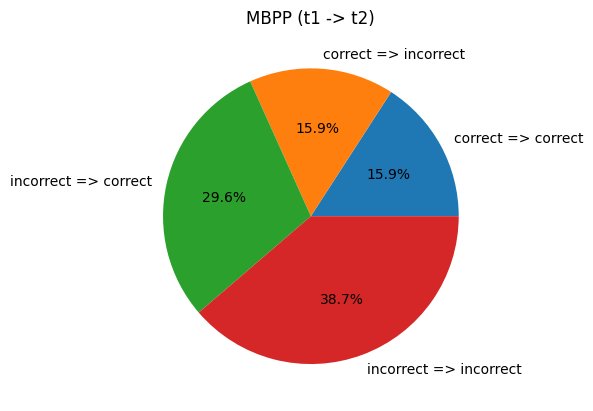

In [21]:
fig, ax = plt.subplots()
ax.pie(t0_to_t1_data, labels = t0_to_t1_names, autopct='%1.1f%%')
ax.set_title("MBPP (t1 -> t2)")
plt.show()

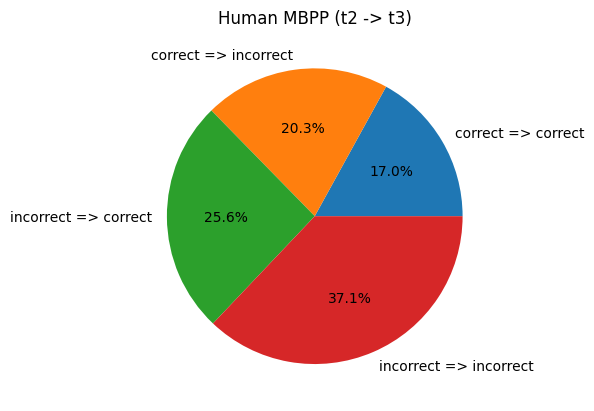

In [22]:
fig, ax = plt.subplots()
ax.pie(t1_to_t2_data, labels = t1_to_t2_names, autopct='%1.1f%%')
ax.set_title("Human MBPP (t2 -> t3)")
plt.show()

### Human Eval 1.5b

In [23]:
t0_to_t1_data, t0_to_t1_names = get_pie_chart_data(human_eval_15b_df, 't0', 't1')
t1_to_t2_data, t1_to_t2_names = get_pie_chart_data(human_eval_15b_df, 't1', 't2')


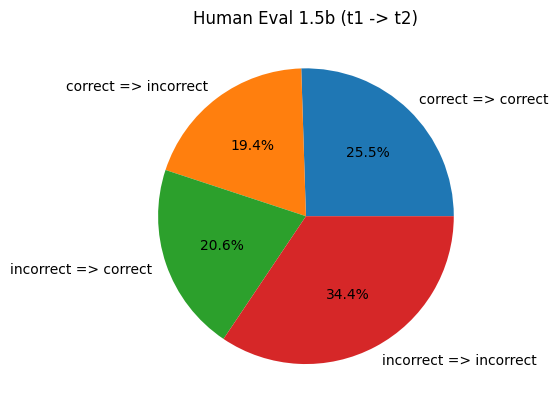

In [24]:
fig, ax = plt.subplots()
ax.pie(t0_to_t1_data, labels = t0_to_t1_names, autopct='%1.1f%%')
ax.set_title("Human Eval 1.5b (t1 -> t2)")
plt.show()

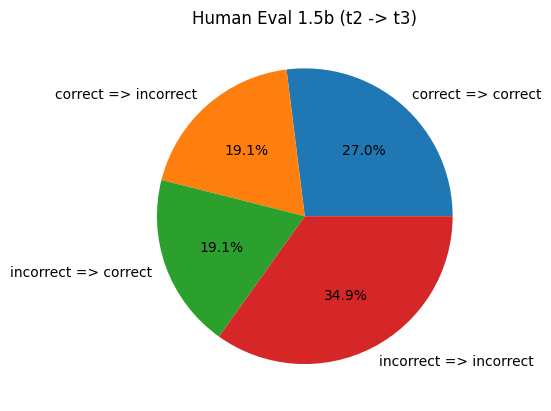

In [25]:
fig, ax = plt.subplots()
ax.pie(t1_to_t2_data, labels = t1_to_t2_names, autopct='%1.1f%%')
ax.set_title("Human Eval 1.5b (t2 -> t3)")
plt.show()

### Human Eval

In [26]:
t0_to_t1_data, t0_to_t1_names = get_pie_chart_data(human_eval_df, 't0', 't1')
t1_to_t2_data, t1_to_t2_names = get_pie_chart_data(human_eval_df, 't1', 't2')
t2_to_t3_data, t2_to_t3_names = get_pie_chart_data(human_eval_df, 't2', 't3')
t3_to_t4_data, t3_to_t4_names = get_pie_chart_data(human_eval_df, 't3', 't4')

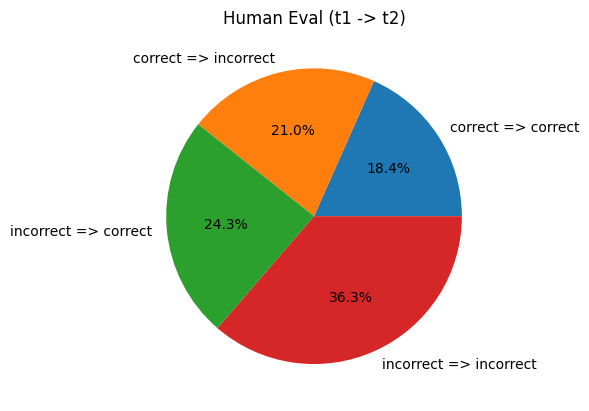

In [27]:
fig, ax = plt.subplots()
ax.pie(t0_to_t1_data, labels = t0_to_t1_names, autopct='%1.1f%%')
ax.set_title("Human Eval (t1 -> t2)")
plt.show()

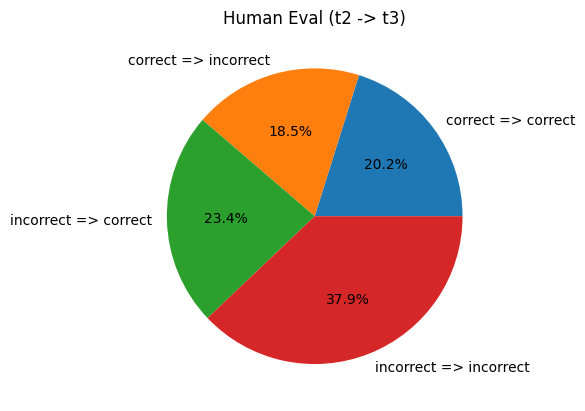

In [28]:
fig, ax = plt.subplots()
ax.pie(t1_to_t2_data, labels = t1_to_t2_names, autopct='%1.1f%%')
ax.set_title("Human Eval (t2 -> t3)")
plt.show()

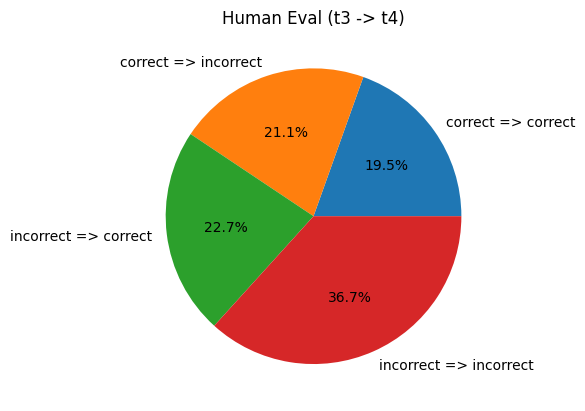

In [29]:
fig, ax = plt.subplots()
ax.pie(t2_to_t3_data, labels = t2_to_t3_names, autopct='%1.1f%%')
ax.set_title("Human Eval (t3 -> t4)")
plt.show()

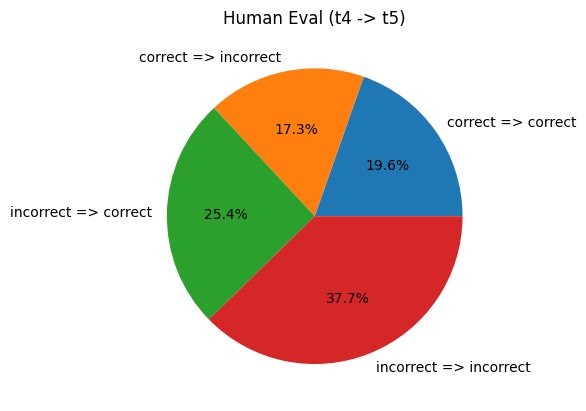

In [30]:
fig, ax = plt.subplots()
ax.pie(t3_to_t4_data, labels = t3_to_t4_names, autopct='%1.1f%%')
ax.set_title("Human Eval (t4 -> t5)")
plt.show()

# SCoRe Trained Model

In [74]:
### SET OUTPUTS FOLDER ###
outputs_folder = "/content/drive/MyDrive/DSSE/GroupProject/outputs-score/"

In [75]:
def get_mbpp_df(mbpp_file_name):
  df = pd.read_json(outputs_folder + mbpp_file_name)
  df.columns = ["t0", "t1", "t2"]
  return df

def get_human_eval_df(human_eval_file_name):
  df = pd.read_json(outputs_folder + human_eval_file_name)
  df.columns = ["t0", "t1", "t2", "t3", "t4"]
  return df

def get_human_eval_15b_df(human_eval_15b_file_name):
  df = pd.read_json(outputs_folder + human_eval_15b_file_name)
  df.columns = ["t0", "t1", "t2"]
  return df

def get_human_eval_df_4turn(human_eval_file_name):
  df = pd.read_json(outputs_folder + human_eval_file_name)
  df.columns = ["t0", "t1", "t2", "t3"]
  return df

## Set File Names

In [76]:
human_eval_score_05_df = get_human_eval_df_4turn("final_eval_results_score_humaneval.json")
human_eval_score_05_df.head()

,t0,t1,t2,t3
0,1.0,1.0,1.0,1.0
1,1.0,1.0,0.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0


## Metrics

In [77]:
### Metrics Function Definitions ###
dbg = False

def dbg_print(msg):
  if dbg:
    print(msg)

def degradation_rate(df, column1, column2):
  # Corrected Outputs = Passed @ t2 when Failed at t1
  dbg_print("\n--------- Degradation Rate ----------")
  incorrect_outputs_df = df[(df[column1] == 0.0) & (df[column2] == 1.0)]
  dbg_print(incorrect_outputs_df.head())
  incorrect_outputs = len(incorrect_outputs_df)
  dbg_print(f"\nInCorrect Outputs: {incorrect_outputs}")
  total_outputs = len(df)
  dbg_print(f"Total Outputs: {total_outputs}")
  return (incorrect_outputs / total_outputs) * 100

def error_reduction_rate(df, column1, column2):
  # Corrected Outputs = Passed @ t2 when Failed at t1
  dbg_print("\n--------- Error Reduction Rate ----------")
  incorrect_outputs_df = df[(df[column1] == 0.0) & (df[column2] == 1.0)]
  dbg_print(incorrect_outputs_df.head())
  incorrect_outputs = len(incorrect_outputs_df)
  dbg_print(f"\nInCorrect Outputs: {incorrect_outputs}")
  total_outputs = len(df)
  dbg_print(f"Total Outputs: {total_outputs}")
  return (incorrect_outputs / total_outputs) * 100

def functional_accuracy(df, column):
  dbg_print("\n--------- Functional Accuracy ----------")
  passed_df = df[(df[column] == 1.0)]
  dbg_print(passed_df.head())
  passed_outputs = len(passed_df)
  dbg_print(f"\nPassed at {column}: {passed_outputs}")
  total_outputs = len(df)
  dbg_print(f"Total Outputs: {total_outputs}")
  return passed_outputs / total_outputs * 100

def self_correction_rate(df, column1, column2):
  # Corrected Outputs = Passed @ t2 when Failed at t1
  dbg_print("\n--------- Self Correction Rate ----------")
  functional_accuracy_1 = functional_accuracy(df, column1)
  dbg_print(f"\nFunctional Accuracy {column1}: {functional_accuracy_1}")
  functional_accuracy_2 = functional_accuracy(df, column2)
  dbg_print(f"\nFunctional Accuracy {column2}: {functional_accuracy_2}")
  return functional_accuracy_1 - functional_accuracy_2

def tabulate_metrics(dict_dfs, column1, column2):
  print(f"\n--------- Tabulated Metrics ({column1} -> {column2}) ----------")

  data = {}

  for name, df in dict_dfs:
    data[name] = [
        self_correction_rate(df, column1, column2),
        error_reduction_rate(df, column1, column2),
        functional_accuracy(df, column1),
        functional_accuracy(df, column2),
        degradation_rate(df, column1, column2)
      ]


  df = pd.DataFrame(data)

  df.index = ['Self Correction Rate', 'Error Reduction Rate', f'Functional Accuracy {column1}', f'Functional Accuracy {column2}', 'Degradation Rate',]

  print(df)

def get_pie_chart_data(df, column1, column2):
  correct_to_correct = len(df[(df[column1] == 'Passed') & (df[column2] == 'Passed')])
  correct_to_incorrect = len(df[(df[column1] == 'Passed') & (df[column2] == 'Failed') | (df[column2] == 'ExecutionFailed')])
  incorrect_to_correct = len(df[(df[column1] == 'Failed') | (df[column1] == 'ExecutionFailed') & (df[column2] == 'Passed')])
  incorrect_to_incorrect = len(df[(df[column1] == 'Failed') | (df[column1] == 'ExecutionFailed') & (df[column2] == 'Failed') | (df[column2] == 'ExecutionFailed')])

  return (np.array([correct_to_correct, correct_to_incorrect, incorrect_to_correct, incorrect_to_incorrect]), ['correct => correct', 'correct => incorrect', 'incorrect => correct', 'incorrect => incorrect'])



### Individual Data

In [78]:
columns = ['t0', 't1']
print("Self Correction Rate: ", self_correction_rate(human_eval_score_05_df, columns[0], columns[1]))
print("Error Reduction Rate: ", error_reduction_rate(human_eval_score_05_df, columns[0], columns[1]))
print(f"Functional Accuracy {columns[0]}: ", functional_accuracy(human_eval_score_05_df, columns[0]))
print(f"Functional Accuracy {columns[1]}: ", functional_accuracy(human_eval_score_05_df, columns[1]))
print("Degradation Rate: ", degradation_rate(human_eval_score_05_df, columns[0], columns[1]))

Self Correction Rate:  1.2195121951219505
Error Reduction Rate:  2.4390243902439024
Functional Accuracy t0:  89.02439024390245
Functional Accuracy t1:  87.8048780487805
Degradation Rate:  2.4390243902439024


In [79]:
columns = ['t1', 't2']
print("Self Correction Rate: ", self_correction_rate(human_eval_score_05_df, columns[0], columns[1]))
print("Error Reduction Rate: ", error_reduction_rate(human_eval_score_05_df, columns[0], columns[1]))
print(f"Functional Accuracy {columns[0]}: ", functional_accuracy(human_eval_score_05_df, columns[0]))
print(f"Functional Accuracy {columns[1]}: ", functional_accuracy(human_eval_score_05_df, columns[1]))
print("Degradation Rate: ", degradation_rate(human_eval_score_05_df, columns[0], columns[1]))

Self Correction Rate:  -1.2195121951219505
Error Reduction Rate:  4.878048780487805
Functional Accuracy t1:  87.8048780487805
Functional Accuracy t2:  89.02439024390245
Degradation Rate:  4.878048780487805


### Tabulated Data

In [80]:
# All tabulated data are percentages (multiplied by 100)
tabulate_metrics([("Human Eval 0.5b 4 Turn", human_eval_score_05_df)], 't0', 't1')
# All tabulated data are percentages (multiplied by 100)
tabulate_metrics([("Human Eval 0.5b 4 Turn", human_eval_score_05_df)], 't1', 't2')
# All tabulated data are percentages (multiplied by 100)
tabulate_metrics([("Human Eval 0.5b 4 Turn", human_eval_score_05_df)], 't2', 't3')


--------- Tabulated Metrics (t0 -> t1) ----------
                        Human Eval 0.5b 4 Turn
Self Correction Rate                  1.219512
Error Reduction Rate                  2.439024
Functional Accuracy t0               89.024390
Functional Accuracy t1               87.804878
Degradation Rate                      2.439024

--------- Tabulated Metrics (t1 -> t2) ----------
                        Human Eval 0.5b 4 Turn
Self Correction Rate                 -1.219512
Error Reduction Rate                  4.878049
Functional Accuracy t1               87.804878
Functional Accuracy t2               89.024390
Degradation Rate                      4.878049

--------- Tabulated Metrics (t2 -> t3) ----------
                        Human Eval 0.5b 4 Turn
Self Correction Rate                  1.219512
Error Reduction Rate                  3.048780
Functional Accuracy t2               89.024390
Functional Accuracy t3               87.804878
Degradation Rate                      3.048780


# SCoRe Trained Model

In [83]:
### SET OUTPUTS FOLDER ###
outputs_folder = "/content/drive/MyDrive/DSSE/GroupProject/outputs-score/"

In [84]:
def get_mbpp_df(mbpp_file_name):
  df = pd.read_json(outputs_folder + mbpp_file_name)
  df.columns = ["t0", "t1", "t2"]
  return df

def get_human_eval_df(human_eval_file_name):
  df = pd.read_json(outputs_folder + human_eval_file_name)
  df.columns = ["t0", "t1", "t2", "t3", "t4"]
  return df

def get_human_eval_15b_df(human_eval_15b_file_name):
  df = pd.read_json(outputs_folder + human_eval_15b_file_name)
  df.columns = ["t0", "t1", "t2"]
  return df

def get_human_eval_df_4turn(human_eval_file_name):
  df = pd.read_json(outputs_folder + human_eval_file_name)
  df.columns = ["t0", "t1", "t2", "t3"]
  return df

## Set File Names

In [85]:
human_eval_score_05_df = get_human_eval_df_4turn("final_eval_results_score_humaneval_temp07.json")
human_eval_score_05_df.head()

,t0,t1,t2,t3
0,True,True,1.0,1.0
1,True,True,1.0,1.0
2,True,True,1.0,1.0
3,True,True,1.0,1.0
4,True,True,1.0,1.0


## Metrics

In [86]:
### Metrics Function Definitions ###
dbg = False

def dbg_print(msg):
  if dbg:
    print(msg)

def degradation_rate(df, column1, column2):
  # Corrected Outputs = Passed @ t2 when Failed at t1
  dbg_print("\n--------- Degradation Rate ----------")
  incorrect_outputs_df = df[(df[column1] == 0.0) & (df[column2] == 1.0)]
  dbg_print(incorrect_outputs_df.head())
  incorrect_outputs = len(incorrect_outputs_df)
  dbg_print(f"\nInCorrect Outputs: {incorrect_outputs}")
  total_outputs = len(df)
  dbg_print(f"Total Outputs: {total_outputs}")
  return (incorrect_outputs / total_outputs) * 100

def error_reduction_rate(df, column1, column2):
  # Corrected Outputs = Passed @ t2 when Failed at t1
  dbg_print("\n--------- Error Reduction Rate ----------")
  incorrect_outputs_df = df[(df[column1] == 0.0) & (df[column2] == 1.0)]
  dbg_print(incorrect_outputs_df.head())
  incorrect_outputs = len(incorrect_outputs_df)
  dbg_print(f"\nInCorrect Outputs: {incorrect_outputs}")
  total_outputs = len(df)
  dbg_print(f"Total Outputs: {total_outputs}")
  return (incorrect_outputs / total_outputs) * 100

def functional_accuracy(df, column):
  dbg_print("\n--------- Functional Accuracy ----------")
  passed_df = df[(df[column] == 1.0)]
  dbg_print(passed_df.head())
  passed_outputs = len(passed_df)
  dbg_print(f"\nPassed at {column}: {passed_outputs}")
  total_outputs = len(df)
  dbg_print(f"Total Outputs: {total_outputs}")
  return passed_outputs / total_outputs * 100

def self_correction_rate(df, column1, column2):
  # Corrected Outputs = Passed @ t2 when Failed at t1
  dbg_print("\n--------- Self Correction Rate ----------")
  functional_accuracy_1 = functional_accuracy(df, column1)
  dbg_print(f"\nFunctional Accuracy {column1}: {functional_accuracy_1}")
  functional_accuracy_2 = functional_accuracy(df, column2)
  dbg_print(f"\nFunctional Accuracy {column2}: {functional_accuracy_2}")
  return functional_accuracy_1 - functional_accuracy_2

def tabulate_metrics(dict_dfs, column1, column2):
  print(f"\n--------- Tabulated Metrics ({column1} -> {column2}) ----------")

  data = {}

  for name, df in dict_dfs:
    data[name] = [
        self_correction_rate(df, column1, column2),
        error_reduction_rate(df, column1, column2),
        functional_accuracy(df, column1),
        functional_accuracy(df, column2),
        degradation_rate(df, column1, column2)
      ]


  df = pd.DataFrame(data)

  df.index = ['Self Correction Rate', 'Error Reduction Rate', f'Functional Accuracy {column1}', f'Functional Accuracy {column2}', 'Degradation Rate',]

  print(df)

def get_pie_chart_data(df, column1, column2):
  correct_to_correct = len(df[(df[column1] == 'Passed') & (df[column2] == 'Passed')])
  correct_to_incorrect = len(df[(df[column1] == 'Passed') & (df[column2] == 'Failed') | (df[column2] == 'ExecutionFailed')])
  incorrect_to_correct = len(df[(df[column1] == 'Failed') | (df[column1] == 'ExecutionFailed') & (df[column2] == 'Passed')])
  incorrect_to_incorrect = len(df[(df[column1] == 'Failed') | (df[column1] == 'ExecutionFailed') & (df[column2] == 'Failed') | (df[column2] == 'ExecutionFailed')])

  return (np.array([correct_to_correct, correct_to_incorrect, incorrect_to_correct, incorrect_to_incorrect]), ['correct => correct', 'correct => incorrect', 'incorrect => correct', 'incorrect => incorrect'])



### Individual Data

In [87]:
columns = ['t0', 't1']
print("Self Correction Rate: ", self_correction_rate(human_eval_score_05_df, columns[0], columns[1]))
print("Error Reduction Rate: ", error_reduction_rate(human_eval_score_05_df, columns[0], columns[1]))
print(f"Functional Accuracy {columns[0]}: ", functional_accuracy(human_eval_score_05_df, columns[0]))
print(f"Functional Accuracy {columns[1]}: ", functional_accuracy(human_eval_score_05_df, columns[1]))
print("Degradation Rate: ", degradation_rate(human_eval_score_05_df, columns[0], columns[1]))

Self Correction Rate:  0.0
Error Reduction Rate:  6.097560975609756
Functional Accuracy t0:  90.2439024390244
Functional Accuracy t1:  90.2439024390244
Degradation Rate:  6.097560975609756


In [88]:
columns = ['t1', 't2']
print("Self Correction Rate: ", self_correction_rate(human_eval_score_05_df, columns[0], columns[1]))
print("Error Reduction Rate: ", error_reduction_rate(human_eval_score_05_df, columns[0], columns[1]))
print(f"Functional Accuracy {columns[0]}: ", functional_accuracy(human_eval_score_05_df, columns[0]))
print(f"Functional Accuracy {columns[1]}: ", functional_accuracy(human_eval_score_05_df, columns[1]))
print("Degradation Rate: ", degradation_rate(human_eval_score_05_df, columns[0], columns[1]))

Self Correction Rate:  1.8292682926829258
Error Reduction Rate:  6.097560975609756
Functional Accuracy t1:  90.2439024390244
Functional Accuracy t2:  88.41463414634147
Degradation Rate:  6.097560975609756


### Tabulated Data

In [89]:
# All tabulated data are percentages (multiplied by 100)
tabulate_metrics([("Human Eval 0.5b 4 Turn", human_eval_score_05_df)], 't0', 't1')
# All tabulated data are percentages (multiplied by 100)
tabulate_metrics([("Human Eval 0.5b 4 Turn", human_eval_score_05_df)], 't1', 't2')
# All tabulated data are percentages (multiplied by 100)
tabulate_metrics([("Human Eval 0.5b 4 Turn", human_eval_score_05_df)], 't2', 't3')


--------- Tabulated Metrics (t0 -> t1) ----------
                        Human Eval 0.5b 4 Turn
Self Correction Rate                  0.000000
Error Reduction Rate                  6.097561
Functional Accuracy t0               90.243902
Functional Accuracy t1               90.243902
Degradation Rate                      6.097561

--------- Tabulated Metrics (t1 -> t2) ----------
                        Human Eval 0.5b 4 Turn
Self Correction Rate                  1.829268
Error Reduction Rate                  6.097561
Functional Accuracy t1               90.243902
Functional Accuracy t2               88.414634
Degradation Rate                      6.097561

--------- Tabulated Metrics (t2 -> t3) ----------
                        Human Eval 0.5b 4 Turn
Self Correction Rate                  1.829268
Error Reduction Rate                  5.487805
Functional Accuracy t2               88.414634
Functional Accuracy t3               86.585366
Degradation Rate                      5.487805
